In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sphincter.data_preparation import load_prepared_data

In [2]:
raw = pd.read_csv("../data/raw/data_sphincter_paper.csv")
prepped = load_prepared_data("../data/prepared/flow.json")

In [3]:
t = raw.dropna(subset=["speed", "flux"], how="all")
t.describe().T

,count,mean,std,min,25%,50%,75%,max
mouse,776.0,174840.315722,87055.615698,11020.000000,120820.000000,180521.000000,245446.000000,310820.000000
pulse_freq,415.0,5.854585,0.992671,3.889499,5.150429,5.772558,6.473108,8.589837
diam_mean,415.0,6.706981,2.231567,3.078764,5.095969,6.311702,7.703028,19.847279
pressure_d,728.0,60.457594,19.207258,18.700718,50.289832,55.973598,62.840915,154.177720
pressure_s,472.0,65.712319,23.828381,32.651824,52.663074,57.475238,73.357017,155.399638
speed,481.0,5.052428,5.263111,0.064875,1.508334,3.430103,6.848306,42.662970
flux,566.0,210.999565,261.967173,0.858114,59.365670,107.062208,225.022897,1540.861043
diam_mean_before_stim,270.0,5.546226,2.172882,1.292246,3.942502,5.353274,6.745083,11.624506
diam_max_after_stim,270.0,6.129934,2.105948,1.791000,4.501941,5.879631,7.361757,11.760000
diam_min_after_stim,270.0,5.121982,2.314841,0.000000,3.623379,5.040000,6.440894,11.520000


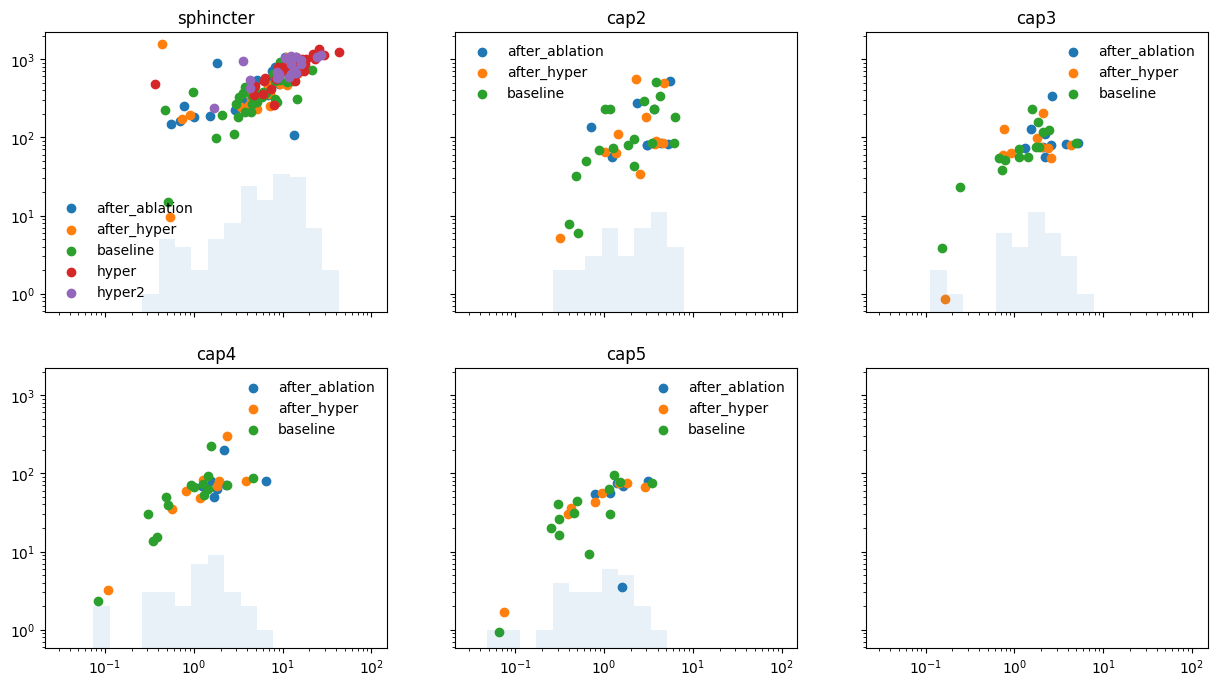

In [43]:
f, axes = plt.subplots(2, 3, figsize=[15, 8], sharex=True, sharey=True)
axes = axes.ravel()

G1 = "vessel"
G2 = "treatment"

for ax, g1 in zip(axes, t.dropna(subset=["speed", "flux"])[G1].unique()):
    subdf = t.loc[lambda df: df[G1] == g1]
    for g2, subsubdf in subdf.groupby(G2):
        ax.scatter(subsubdf["speed"], subsubdf["flux"], label=g2)
    ax.hist(subdf.dropna(subset=["flux"])["speed"], bins=np.logspace(-1.5, 2, 20), alpha=0.1)
    ax.legend(frameon=False)
    ax.semilogx()
    ax.semilogy()
    ax.set(title=g1)

In [5]:
t["speed"].notnull().sum(), t["flux"].notnull().sum(), len(raw), len(t), t[["speed", "flux"]].notnull().all(axis=1).sum()

(481, 566, 1525, 776, 271)

In [6]:
g = t.groupby(["age", "vessel", "treatment"])

pd.DataFrame(
    {
        "mean_speed": g["speed"].mean(),
        "mean_flux": g["speed"].mean()
    }
).unstack(["vessel", "age"]).sort_index(axis=1)

mean_flux                                                    \
vessel              bulb                cap1                cap2             
age                adult       old     adult       old     adult       old   
treatment                                                                    
after_ablation  3.946733  2.577140  4.979504  3.358386  4.242080  1.826163   
after_hyper     3.770358  2.151869  4.332910  2.529249  3.484344  1.587459   
baseline        3.090931  2.125893  3.482478  2.865973  2.887978  1.992383   
hyper           8.329250  4.718922  5.507797  5.904242       NaN       NaN   
hyper2          7.096054  6.013431  7.309025  9.480184       NaN       NaN   

                                                        ... mean_speed  \
vessel              cap3                cap4            ...       cap2   
age                adult       old     adult       old  ...      adult   
treatment                                               ...              
after_ablation  2.957839  2.209894  2.881711  1.555213  ...   4.242080   
after_hyper     2.347382  1.212881  1.957457  1.032810  ...   3.484344   
baseline        1.648416  1.404821  1.523459  0.928435  ...   2.887978   
hyper                NaN       NaN       NaN       NaN  ...        NaN   
hyper2               NaN       NaN       NaN       NaN  ...        NaN   

                                                                            \
vessel                        cap3                cap4                cap5   
age                  old     adult       old     adult       old     adult   
treatment                                                                    
after_ablation  1.826163  2.957839  2.209894  2.881711  1.555213  1.884155   
after_hyper     1.587459  2.347382  1.212881  1.957457  1.032810  1.398724   
baseline        1.992383  1.648416  1.404821  1.523459  0.928435  1.058879   
hyper                NaN       NaN       NaN       NaN       NaN       NaN   
hyper2               NaN       NaN       NaN       NaN       NaN       NaN   

                                                
vessel                    sphincter             
age                  old      adult        old  
treatment                                       
after_ablation  1.332916   7.681766   4.731099  
after_hyper     0.800697   8.850633   5.836174  
baseline        0.598099   7.203323   6.276281  
hyper                NaN  16.390061  12.412271  
hyper2               NaN  14.438994   9.940634  

[5 rows x 28 columns]